# Getting started: Chromosome Block Networks

Here, our blocks are chromosomes and interactions between them are defined by the underlying gene co-expression network.

In [124]:
# Go to path where script is located
!cd ~/pychromnet/
import gene_network as gn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
def symmetrize(a):
    """Symmetrize a non-symmetric matrix."""
    
    return np.triu(a) + np.tril(a).T - np.diag(a.diagonal())

## Global Variables

In [3]:
BIO = '/Users/rdora/Downloads/biomart.txt'
SIF = '/Users/rdora/Downloads/healthy.sif.10k'

In [109]:
BASAL = '/Users/rdora/Downloads/basal.sif.10k'
LUMA = '/Users/rdora/Downloads/luma.sif.10k'
LUMB = '/Users/rdora/Downloads/lumb.sif.10k'
HER2 = '/Users/rdora/Downloads/her2.sif.10k'

## Load tables and networks

### Healthy

In [5]:
block_G, block_net = gn.gene_network(SIF,
                           BIO,
                           start='Gene start (bp)',
                           block='Chromosome/scaffold name')

### Basal

In [112]:
basal_G, basal_net = gn.gene_network(BASAL,
                           BIO,
                           start='Gene start (bp)',
                           block='Chromosome/scaffold name')

### LumA

In [113]:
luma_G, luma_net = gn.gene_network(LUMA,
                           BIO,
                           start='Gene start (bp)',
                           block='Chromosome/scaffold name')

### LumB

In [114]:
lumb_G, lumb_net = gn.gene_network(LUMB,
                           BIO,
                           start='Gene start (bp)',
                           block='Chromosome/scaffold name')

### Her2

In [115]:
her2_G, her2_net = gn.gene_network(HER2,
                           BIO,
                           start='Gene start (bp)',
                           block='Chromosome/scaffold name')

## Distribution of Co-expression across chromosomes

In [7]:
block_net.head()

,Chromosome/scaffold name_1,Chromosome/scaffold name_2,strength,median_weight,max_weight,min_weight,std_weight,n_pairs,mean_distance,median_distance
0,1,1,0.225747,0.206051,0.568734,0.180618,0.056433,240,7.208982e+07,60391117.5
1,1,10,0.213760,0.199553,0.374584,0.180812,0.039016,120,0.000000e+00,0.0
2,1,11,0.214147,0.208084,0.417730,0.180661,0.032721,138,0.000000e+00,0.0
3,1,12,0.215518,0.204078,0.361651,0.181398,0.034883,142,0.000000e+00,0.0
4,1,13,0.206606,0.206733,0.240360,0.182454,0.019454,20,0.000000e+00,0.0


## Data pre-processing

### Healthy

In [20]:
df = block_net.rename(columns={'Chromosome/scaffold name_1': 'chrom_1',
               'Chromosome/scaffold name_2': 'chrom_2'})

df = df.replace('X', '23')

df['chrom_1'] = df['chrom_1'].astype('int')
df['chrom_2'] = df['chrom_2'].astype('int')

df = df.sort_values(['chrom_1', 'chrom_2'])

### Basal

In [94]:
basal = basal_net.rename(columns={'Chromosome/scaffold name_1': 'chrom_1',
               'Chromosome/scaffold name_2': 'chrom_2'})

basal = basal.replace('X', '23')

basal['chrom_1'] = basal['chrom_1'].astype('int')
basal['chrom_2'] = basal['chrom_2'].astype('int')

basal = basal.sort_values(['chrom_1', 'chrom_2'])

### LumA

In [117]:
luma = luma_net.rename(columns={'Chromosome/scaffold name_1': 'chrom_1',
               'Chromosome/scaffold name_2': 'chrom_2'})

luma = luma.replace('X', '23')

luma['chrom_1'] = luma['chrom_1'].astype('int')
luma['chrom_2'] = luma['chrom_2'].astype('int')

luma = luma.sort_values(['chrom_1', 'chrom_2'])

### LumB

In [118]:
lumb = lumb_net.rename(columns={'Chromosome/scaffold name_1': 'chrom_1',
               'Chromosome/scaffold name_2': 'chrom_2'})

lumb = lumb.replace('X', '23')

lumb['chrom_1'] = lumb['chrom_1'].astype('int')
lumb['chrom_2'] = lumb['chrom_2'].astype('int')

lumb = lumb.sort_values(['chrom_1', 'chrom_2'])

### Her-2

In [119]:
her2 = her2_net.rename(columns={'Chromosome/scaffold name_1': 'chrom_1',
               'Chromosome/scaffold name_2': 'chrom_2'})

her2 = her2.replace('X', '23')

her2['chrom_1'] = her2['chrom_1'].astype('int')
her2['chrom_2'] = her2['chrom_2'].astype('int')

her2 = her2.sort_values(['chrom_1', 'chrom_2'])

## Heatmaps

In [82]:
df.columns

Index(['chrom_1', 'chrom_2', 'strength', 'median_weight', 'max_weight',
       'min_weight', 'std_weight', 'n_pairs', 'mean_distance',
       'median_distance'],
      dtype='object')

In [107]:
target_value = 'strength'

### Healthy

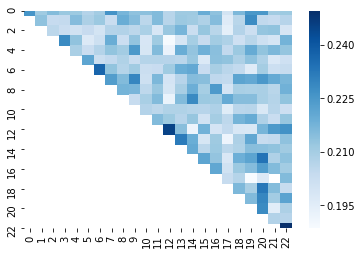

In [108]:
df_s = df[['chrom_1', 'chrom_2', target_value]]

mat_s = pd.pivot(df_s, index='chrom_1', columns='chrom_2').values

mat_s = np.nan_to_num(mat_s, nan=0)

mat_s = symmetrize(mat_s)
mat_s = np.where(mat_s==0, np.nan, mat_s)
sns.heatmap(mat_s, cmap='Blues')

### Basal

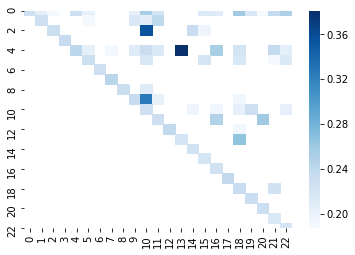

In [104]:
df_s = basal[['chrom_1', 'chrom_2', target_value]]

mat_s = pd.pivot(df_s, index='chrom_1', columns='chrom_2').values

mat_s = np.nan_to_num(mat_s, nan=0)

mat_s = symmetrize(mat_s)
mat_s = np.where(mat_s==0, np.nan, mat_s)
sns.heatmap(mat_s, cmap='Blues')

### LumA

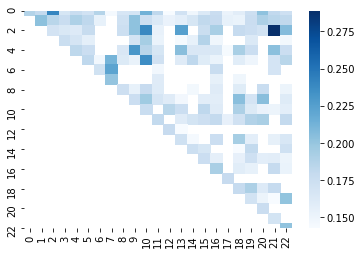

In [120]:
df_s = luma[['chrom_1', 'chrom_2', target_value]]

mat_s = pd.pivot(df_s, index='chrom_1', columns='chrom_2').values

mat_s = np.nan_to_num(mat_s, nan=0)

mat_s = symmetrize(mat_s)
mat_s = np.where(mat_s==0, np.nan, mat_s)
sns.heatmap(mat_s, cmap='Blues')

### LumB

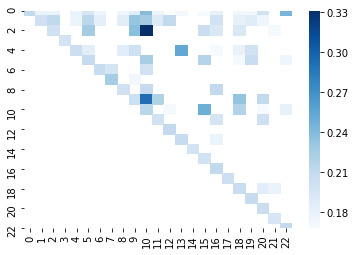

In [121]:
df_s = lumb[['chrom_1', 'chrom_2', target_value]]

mat_s = pd.pivot(df_s, index='chrom_1', columns='chrom_2').values

mat_s = np.nan_to_num(mat_s, nan=0)

mat_s = symmetrize(mat_s)
mat_s = np.where(mat_s==0, np.nan, mat_s)
sns.heatmap(mat_s, cmap='Blues')

### Her2

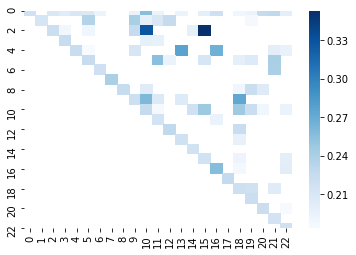

In [122]:
df_s = her2[['chrom_1', 'chrom_2', target_value]]

mat_s = pd.pivot(df_s, index='chrom_1', columns='chrom_2').values

mat_s = np.nan_to_num(mat_s, nan=0)

mat_s = symmetrize(mat_s)
mat_s = np.where(mat_s==0, np.nan, mat_s)
sns.heatmap(mat_s, cmap='Blues')